In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kidney-stone-data/kidney_stone_data.csv


In [2]:
df = pd.read_csv('/kaggle/input/kidney-stone-data/kidney_stone_data.csv')
df.head()

,treatment,stone_size,success
0,B,large,1
1,A,large,1
2,A,large,0
3,A,large,1
4,A,large,1


In [3]:
df.isnull().sum()

treatment     0
stone_size    0
success       0
dtype: int64

# **Visualization**

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

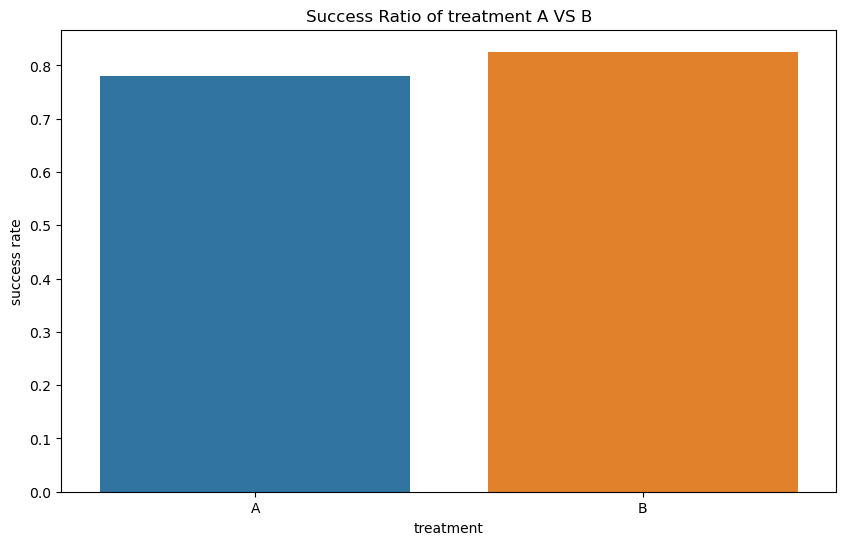

In [5]:
success_rate = df.groupby('treatment')['success'].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=success_rate.index, y=success_rate.values)
plt.xlabel('treatment')
plt.ylabel('success rate')
plt.title('Success Ratio of treatment A VS B')
plt.show()

<Figure size 800x600 with 0 Axes>

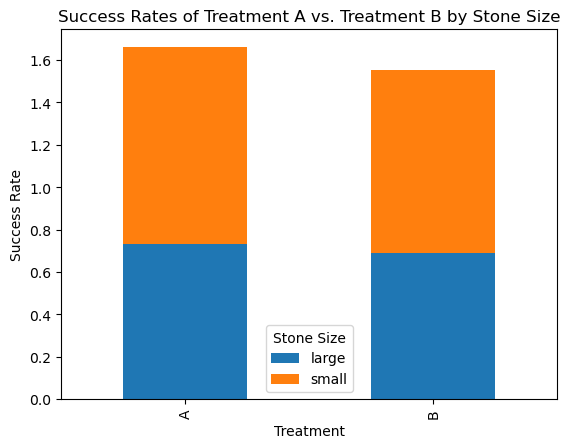

In [6]:
# Calculate success rates for each treatment and stone size combination
success_rates_by_size = df.groupby(['treatment', 'stone_size'])['success'].mean().unstack()

# Plot the stacked bar plot
plt.figure(figsize=(8, 6))
success_rates_by_size.plot(kind='bar', stacked=True)
plt.xlabel('Treatment')
plt.ylabel('Success Rate')
plt.title('Success Rates of Treatment A vs. Treatment B by Stone Size')
plt.legend(title='Stone Size')
plt.show()


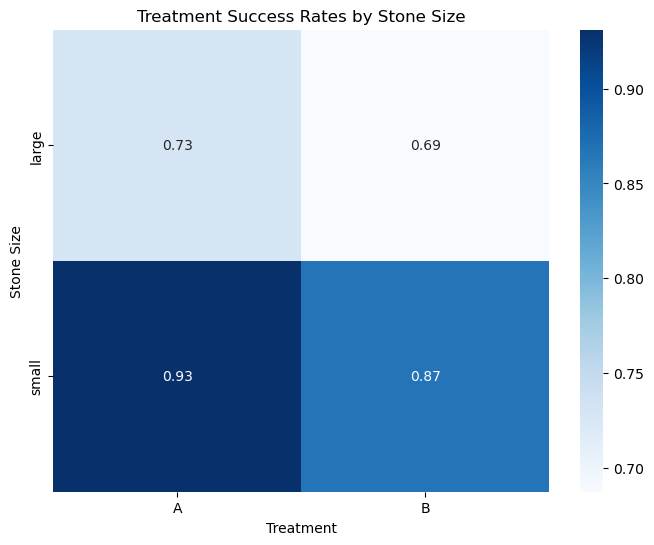

In [7]:
pivot_table = df.pivot_table(values='success', index='stone_size', columns='treatment', aggfunc='mean')

plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel('Treatment')
plt.ylabel('Stone Size')
plt.title('Treatment Success Rates by Stone Size')
plt.show()


# **Logistic Regression**

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop("success", axis=1)
y = df["success"]

# Perform one-hot encoding on the categorical variables
X = pd.get_dummies(X, columns=["treatment", "stone_size"], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the logistic regression model
model = LogisticRegression()

# Define the parameter grid for GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear']
}


In [10]:
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [11]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [12]:
X = df.drop("success", axis=1)
y = df["success"]

# Perform one-hot encoding on the categorical variables
X = pd.get_dummies(X, columns=["treatment", "stone_size"], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the logistic regression model with the best hyperparameters
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

# Fit the logistic regression model
model.fit(X_train, y_train)


accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.780952380952381
